# Importation de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Importation de données

In [2]:
# Charger le dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", 
    "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, names=column_names, na_values="?")

# Afficher les premières lignes
data.head()

# Gestion des valeurs manquantes
data["ca"].fillna(data["ca"].median(), inplace=True)
data["thal"].fillna(data["thal"].mode()[0], inplace=True)

# Convertir la cible en binaire (1 = maladie cardiaque, 0 = pas de maladie)
data["target"] = data["target"].apply(lambda x: 1 if x > 0 else 0)

# Séparer les caractéristiques (X) et la cible (y)
X = data.drop("target", axis=1)
y = data["target"]

# Normaliser les données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Germain\AppData\Local\Temp\ipykernel_19500\3661019933.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["ca"].fillna(data["ca"].median(), inplace=True)
C:\Users\Germain\AppData\Local\Temp\ipykernel_19500\3661019933.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

# Analyse Exploratoire des Données

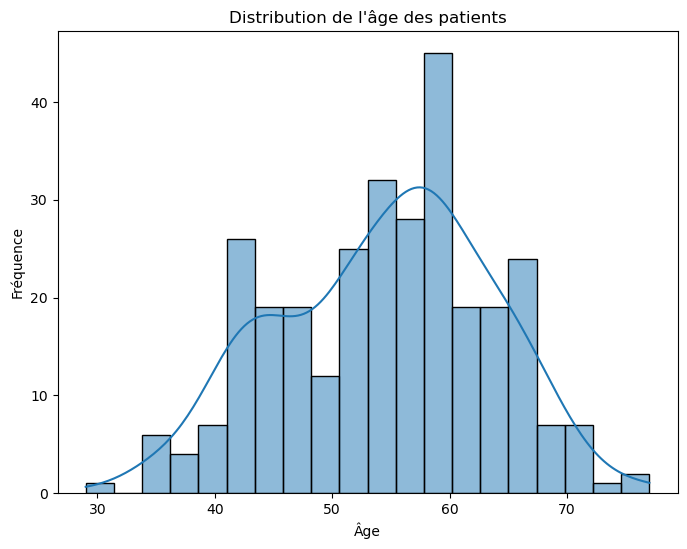

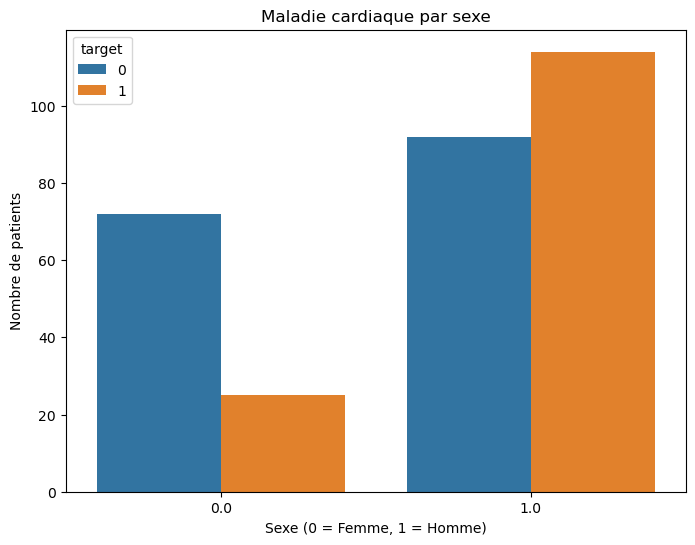

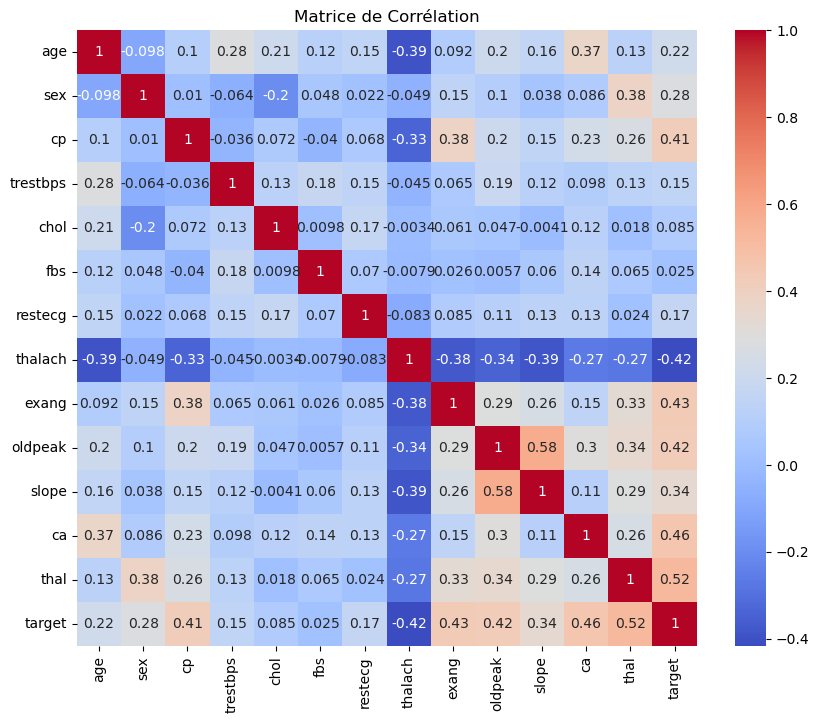

In [3]:
# Distribution de l'âge
plt.figure(figsize=(8, 6))
sns.histplot(data["age"], bins=20, kde=True)
plt.title("Distribution de l'âge des patients")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

# Relation entre le sexe et la maladie cardiaque
plt.figure(figsize=(8, 6))
sns.countplot(x="sex", hue="target", data=data)
plt.title("Maladie cardiaque par sexe")
plt.xlabel("Sexe (0 = Femme, 1 = Homme)")
plt.ylabel("Nombre de patients")
plt.show()

# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de Corrélation")
plt.show()

#  Entraînement et Évaluation des Modèles

In [4]:
# Fonction pour entraîner et évaluer les modèles
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Support Vector Machine": SVC(probability=True),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "AdaBoost": AdaBoostClassifier()
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        results[name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "AUC-ROC": roc_auc_score(y_test, y_proba)
        }

    return results

# Entraîner et évaluer les modèles
results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

# Afficher les résultats
for model_name, metrics in results.items():
    print(f"**{model_name}**")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1-Score: {metrics['F1-Score']:.2f}")
    print(f"AUC-ROC: {metrics['AUC-ROC']:.2f}")
    print("---")

**Logistic Regression**
Accuracy: 0.89
Precision: 0.88
Recall: 0.91
F1-Score: 0.89
AUC-ROC: 0.92
---
**K-Nearest Neighbors**
Accuracy: 0.92
Precision: 0.94
Recall: 0.91
F1-Score: 0.92
AUC-ROC: 0.96
---
**Support Vector Machine**
Accuracy: 0.90
Precision: 0.93
Recall: 0.88
F1-Score: 0.90
AUC-ROC: 0.94
---
**Decision Tree**
Accuracy: 0.74
Precision: 0.79
Recall: 0.69
F1-Score: 0.73
AUC-ROC: 0.74
---
**Random Forest**
Accuracy: 0.87
Precision: 0.90
Recall: 0.84
F1-Score: 0.87
AUC-ROC: 0.93
---
**AdaBoost**
Accuracy: 0.84
Precision: 0.89
Recall: 0.78
F1-Score: 0.83
AUC-ROC: 0.92
---


C:\Users\Germain\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#  Visualisation des Résultats

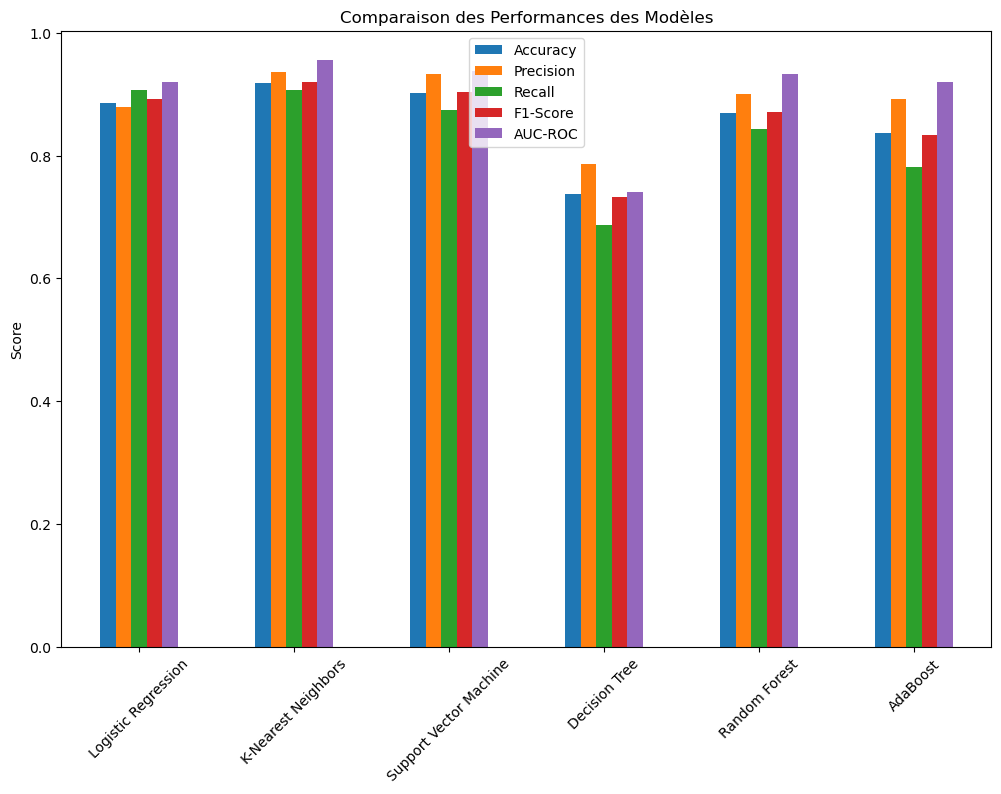

NameError: name 'models' is not defined

<Figure size 1000x800 with 0 Axes>

In [5]:
# Comparaison des modèles
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind="bar", figsize=(12, 8))
plt.title("Comparaison des Performances des Modèles")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

# Courbe ROC pour tous les modèles
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Courbe ROC")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.legend()
plt.show()

#  Prédiction avec un Modèle

In [6]:
# Exemple de prédiction avec Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Données d'entrée pour la prédiction
input_data = [[
    50, 1, 3, 120, 200, 0, 0, 150, 0, 1.0, 0, 0, 3  # Exemple de données
]]

# Prédiction
prediction = model.predict(input_data)
prediction_proba = model.predict_proba(input_data)

print(f"Prédiction : {'Maladie Cardiaque détectée' if prediction[0] == 1 else 'Pas de maladie cardiaque détectée'}")
print(f"Probabilité de maladie cardiaque : {prediction_proba[0][1]:.2f}")
print(f"Probabilité de non-maladie cardiaque : {prediction_proba[0][0]:.2f}")

Prédiction : Maladie Cardiaque détectée
Probabilité de maladie cardiaque : 0.77
Probabilité de non-maladie cardiaque : 0.23
